In [3]:
import sqlite3
import pandas as pd
import numpy as np

In [4]:
path = "./soccer/"  
database = path + 'database.sqlite'
conn = sqlite3.connect(database)

In [5]:
#Fetching required data tables
player_data = pd.read_sql("SELECT * FROM Player;", conn)
player_stats_data = pd.read_sql("SELECT * FROM Player_Attributes;", conn)
team_data = pd.read_sql("SELECT * FROM Team;", conn)
match_data = pd.read_sql("SELECT * FROM Match;", conn)
countries = pd.read_sql_query("SELECT * from Country", conn)
leagues = pd.read_sql_query("SELECT * from League", conn)

In [6]:
match_data_imp = match_data.iloc[:,1:11]
away_team_matches= team_data.merge(match_data_imp,left_on="team_api_id",right_on="away_team_api_id")
home_team_matches = team_data.merge(match_data_imp,left_on="team_api_id",right_on="home_team_api_id")
ID_h=["team_api_id","home_team_api_id"]
ID_a=['team_api_id','away_team_api_id']
home_team_matches.drop(ID_h,axis=1,inplace=True)
away_team_matches.drop(ID_a,axis=1,inplace=True)


In [7]:
away_team_matches.columns[10:13]

Index(['home_team_api_id', 'home_team_goal', 'away_team_goal'], dtype='object')

In [8]:
home_team_matches.rename(columns=dict(zip(home_team_matches.columns[10:13],["opponent_team_id","goals_scored","goals_conceded"])), inplace=True)
away_team_matches.rename(columns=dict(zip(away_team_matches.columns[10:13],["opponent_team_id","goals_conceded","goals_scored"])), inplace=True)
h = pd.DataFrame(["home" for x in range(home_team_matches.shape[0])])
a = pd.DataFrame(["away" for x in range(away_team_matches.shape[0])])
h.columns=["side"]
a.columns=["side"]
home_team_matches=pd.concat([home_team_matches,h], axis=1)
away_team_matches=pd.concat([away_team_matches,a], axis=1)
home_team_matches

,id,team_fifa_api_id,team_long_name,team_short_name,country_id,league_id,season,stage,date,match_api_id,opponent_team_id,goals_scored,goals_conceded,side
0,1,673.0,KRC Genk,GEN,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9993,1,1,home
1,1,673.0,KRC Genk,GEN,1,1,2008/2009,12,2008-11-15 00:00:00,492583,9999,1,1,home
2,1,673.0,KRC Genk,GEN,1,1,2008/2009,14,2008-11-29 00:00:00,492651,9984,3,2,home
3,1,673.0,KRC Genk,GEN,1,1,2008/2009,16,2008-12-13 00:00:00,492713,9986,1,0,home
4,1,673.0,KRC Genk,GEN,1,1,2008/2009,19,2009-01-24 00:00:00,492805,9998,2,0,home
5,1,673.0,KRC Genk,GEN,1,1,2008/2009,21,2009-02-07 00:00:00,492992,10000,1,2,home
6,1,673.0,KRC Genk,GEN,1,1,2008/2009,23,2009-02-20 00:00:00,493014,9996,1,1,home
7,1,673.0,KRC Genk,GEN,1,1,2008/2009,25,2009-03-07 00:00:00,493029,7947,4,3,home
8,1,673.0,KRC Genk,GEN,1,1,2008/2009,27,2009-03-21 00:00:00,493050,4049,3,0,home
9,1,673.0,KRC Genk,GEN,1,1,2008/2009,28,2009-04-04 00:00:00,493059,10001,1,4,home


In [819]:
away_team_matches

,id,team_fifa_api_id,team_long_name,team_short_name,country_id,league_id,season,stage,date,match_api_id,opponent_team_id,goals_conceded,goals_scored,side
0,1,673.0,KRC Genk,GEN,1,1,2008/2009,10,2008-11-01 00:00:00,492571,4049,1,3,away
1,1,673.0,KRC Genk,GEN,1,1,2008/2009,11,2008-11-08 00:00:00,492580,10001,1,0,away
2,1,673.0,KRC Genk,GEN,1,1,2008/2009,13,2008-11-23 00:00:00,492628,9991,2,3,away
3,1,673.0,KRC Genk,GEN,1,1,2008/2009,15,2008-12-07 00:00:00,492702,8571,3,1,away
4,1,673.0,KRC Genk,GEN,1,1,2008/2009,17,2008-12-19 00:00:00,492742,8635,2,0,away
5,1,673.0,KRC Genk,GEN,1,1,2008/2009,18,2009-01-18 00:00:00,492769,9993,4,1,away
6,1,673.0,KRC Genk,GEN,1,1,2008/2009,2,2008-08-24 00:00:00,492485,9998,3,1,away
7,1,673.0,KRC Genk,GEN,1,1,2008/2009,20,2009-02-01 00:00:00,492844,9994,1,2,away
8,1,673.0,KRC Genk,GEN,1,1,2008/2009,22,2009-02-15 00:00:00,492999,8342,0,2,away
9,1,673.0,KRC Genk,GEN,1,1,2008/2009,24,2009-02-27 00:00:00,493017,8203,2,1,away


In [9]:
all_matches=pd.concat([home_team_matches,away_team_matches],axis=0,ignore_index=True)
all_matches = all_matches.reindex_axis(home_team_matches.columns, axis=1)
all_matches

,id,team_fifa_api_id,team_long_name,team_short_name,country_id,league_id,season,stage,date,match_api_id,opponent_team_id,goals_scored,goals_conceded,side
0,1,673.0,KRC Genk,GEN,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9993,1,1,home
1,1,673.0,KRC Genk,GEN,1,1,2008/2009,12,2008-11-15 00:00:00,492583,9999,1,1,home
2,1,673.0,KRC Genk,GEN,1,1,2008/2009,14,2008-11-29 00:00:00,492651,9984,3,2,home
3,1,673.0,KRC Genk,GEN,1,1,2008/2009,16,2008-12-13 00:00:00,492713,9986,1,0,home
4,1,673.0,KRC Genk,GEN,1,1,2008/2009,19,2009-01-24 00:00:00,492805,9998,2,0,home
5,1,673.0,KRC Genk,GEN,1,1,2008/2009,21,2009-02-07 00:00:00,492992,10000,1,2,home
6,1,673.0,KRC Genk,GEN,1,1,2008/2009,23,2009-02-20 00:00:00,493014,9996,1,1,home
7,1,673.0,KRC Genk,GEN,1,1,2008/2009,25,2009-03-07 00:00:00,493029,7947,4,3,home
8,1,673.0,KRC Genk,GEN,1,1,2008/2009,27,2009-03-21 00:00:00,493050,4049,3,0,home
9,1,673.0,KRC Genk,GEN,1,1,2008/2009,28,2009-04-04 00:00:00,493059,10001,1,4,home


In [10]:
def get_match_label(match):
    ''' Derives a label for a given match. '''
     
    label = pd.DataFrame()
    #Identify match label 
    for i in range(match.shape[0]):
        if match.loc[i,'goals_scored'] > match.loc[i,'goals_conceded']:
            label.loc[i,'Result']= "Win"
        elif match.loc[i,'goals_scored'] == match.loc[i,'goals_conceded']:
            label.loc[i,'Result']= "Draw"
        elif match.loc[i,'goals_scored'] < match.loc[i,'goals_conceded']:
            label.loc[i,'Result']= "Defeat"

    #Return label        
    return label

In [11]:
label=get_match_label(all_matches)

In [12]:
all_matches=pd.concat([all_matches,label],axis=1)

In [13]:
all_matches

,id,team_fifa_api_id,team_long_name,team_short_name,country_id,league_id,season,stage,date,match_api_id,opponent_team_id,goals_scored,goals_conceded,side,Result
0,1,673.0,KRC Genk,GEN,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9993,1,1,home,Draw
1,1,673.0,KRC Genk,GEN,1,1,2008/2009,12,2008-11-15 00:00:00,492583,9999,1,1,home,Draw
2,1,673.0,KRC Genk,GEN,1,1,2008/2009,14,2008-11-29 00:00:00,492651,9984,3,2,home,Win
3,1,673.0,KRC Genk,GEN,1,1,2008/2009,16,2008-12-13 00:00:00,492713,9986,1,0,home,Win
4,1,673.0,KRC Genk,GEN,1,1,2008/2009,19,2009-01-24 00:00:00,492805,9998,2,0,home,Win
5,1,673.0,KRC Genk,GEN,1,1,2008/2009,21,2009-02-07 00:00:00,492992,10000,1,2,home,Defeat
6,1,673.0,KRC Genk,GEN,1,1,2008/2009,23,2009-02-20 00:00:00,493014,9996,1,1,home,Draw
7,1,673.0,KRC Genk,GEN,1,1,2008/2009,25,2009-03-07 00:00:00,493029,7947,4,3,home,Win
8,1,673.0,KRC Genk,GEN,1,1,2008/2009,27,2009-03-21 00:00:00,493050,4049,3,0,home,Win
9,1,673.0,KRC Genk,GEN,1,1,2008/2009,28,2009-04-04 00:00:00,493059,10001,1,4,home,Defeat


In [31]:
team_stats = all_matches.groupby(['team_long_name','league_id'])

In [752]:
home_team_matches['team_long_name'].describe()

count             25979
unique              296
top       Chievo Verona
freq                152
Name: team_long_name, dtype: object

In [15]:
away_matches=[]
home_matches=[]

print(type(team_stats['side'].describe()['freq'][0]))
for i in range(len(team_stats['side'].describe()['top'])):
    if team_stats['side'].describe()['top'][i]=='away':
        away_matches.append(team_stats['side'].describe()['freq'][i])
        home_matches.append(team_stats['side'].describe()['count'][i]-team_stats['side'].describe()['freq'][i])
    else:
        home_matches.append(team_stats['side'].describe()['freq'][i])
        away_matches.append(team_stats['side'].describe()['count'][i]-team_stats['side'].describe()['freq'][i])
        


<class 'numpy.int64'>


In [16]:
home_matches=pd.DataFrame(home_matches)
home_matches.columns=['h_matches']
away_matches=pd.DataFrame(away_matches)
away_matches.columns=['a_matches']
home_matches.shape

(296, 1)

In [261]:
team_stats_gp=all_matches.set_index(['team_long_name','league_id'])

In [510]:
team_stats['side'].describe()

,,count,unique,top,freq
team_long_name,league_id,,,,
1. FC Kaiserslautern,7809,68,2,away,34
1. FC Köln,7809,204,2,away,102
1. FC Nürnberg,7809,170,2,away,85
1. FSV Mainz 05,7809,238,2,away,119
AC Ajaccio,4769,114,2,away,57
AC Arles-Avignon,4769,38,2,away,19
AC Bellinzona,24558,108,2,away,54
ADO Den Haag,13274,272,2,away,136
AJ Auxerre,4769,152,2,away,76


In [490]:
rows=list(df.index)
#print(len(rows))
#print((pd.DataFrame(team_stats_gp['side'][rows[0]])).shape)
#print(type(away_matches.loc[0,'a_matches']))
team_stats_gp_temp=[]


win=[]
loss=[]
draw=[]
ad=[]
hd=[]



ts=[]
tc=[]
hs=[]
hc=[]
home_w=[]
home_l=[]
away_w=[]
away_l=[]
for i in range(away_matches.shape[0]):
    s=0
    c=0
    hw=0
    aw=0
    hl=0
    al=0 
    w=0
    l=0
    d=0
    ## away matches
    ad.append(np.repeat(away_matches.loc[i,'a_matches'],team_stats_gp['side'][rows[i]].shape[0]))
    #team_stats_gp_temp=np.concatenate((team_stats_gp_temp,ad))
    ## home matches
    hd.append(np.repeat(home_matches.loc[i,'h_matches'],team_stats_gp['side'][rows[i]].shape[0]))
    #team_stats_gp_temp=np.concatenate((team_stats_gp_temp,hd))
    ## total score
    ts.append(np.repeat(np.sum(team_stats_gp['goals_scored'][rows[i]]),team_stats_gp['side'][rows[i]].shape[0]))
    ## total conceded
    tc.append(np.repeat(np.sum(team_stats_gp['goals_conceded'][rows[i]]),team_stats_gp['side'][rows[i]].shape[0]))
   # team_stats_gp_temp=np.concatenate((team_stats_gp_temp,ts))
    for k in (team_stats_gp['Result'][rows[i]]):
        if k == 'Win':
              w=w+1
        elif k == 'Draw':
              d=d+1
        else:
              l=l+1
    ## number of wins          
    win.append(np.repeat(w,team_stats_gp['side'][rows[i]].shape[0]))
    ## number of losses
    loss.append(np.repeat(l,team_stats_gp['side'][rows[i]].shape[0]))
    ## number of draws
    draw.append(np.repeat(d,team_stats_gp['side'][rows[i]].shape[0]))
        
    for j in range(len(team_stats_gp['side'][rows[i]])):
        if team_stats_gp['side'][rows[i]].iloc[j] == 'home':
            s=s+team_stats_gp['goals_scored'][rows[i]].iloc[j]
            c=c+team_stats_gp['goals_conceded'][rows[i]].iloc[j]
            if team_stats_gp['Result'][rows[i]].iloc[j] == 'Win':
                hw=hw+1
            elif team_stats_gp['Result'][rows[i]].iloc[j] == 'Defeat':
                hl=hl+1
        else:
            if team_stats_gp['Result'][rows[i]].iloc[j] == 'Win':
                aw=aw+1
            elif team_stats_gp['Result'][rows[i]].iloc[j] == 'Defeat':
                al=al+1

    ## home scored
    hs.append(np.repeat(s,team_stats_gp['side'][rows[i]].shape[0]))
    ## home conceded
    hc.append(np.repeat(c,team_stats_gp['side'][rows[i]].shape[0]))  
    ## home wins
    home_w.append(np.repeat(hw,team_stats_gp['side'][rows[i]].shape[0]))
    ## home loss
    home_l.append(np.repeat(hl,team_stats_gp['side'][rows[i]].shape[0]))
    ## away wins
    away_w.append(np.repeat(aw,team_stats_gp['side'][rows[i]].shape[0]))
    ## away loss
    away_l.append(np.repeat(al,team_stats_gp['side'][rows[i]].shape[0]))
             


In [491]:
ts=np.concatenate(ts)
ad=np.concatenate(ad)
hd=np.concatenate(hd)
tc=np.concatenate(tc)
win=np.concatenate(win)
loss=np.concatenate(loss)
draw=np.concatenate(draw)
hs=np.concatenate(hs)
hc=np.concatenate(hc)
home_w=np.concatenate(home_w)
home_l=np.concatenate(home_l)
away_w=np.concatenate(away_w)
away_l=np.concatenate(away_l)

## away scored
away_s=ts-hs
## away conceded
away_c=tc-hc


In [622]:
team_stats_temp=pd.DataFrame({ 'Total Scores': ts,'Away Matches':ad ,'Home Matches':hd,'Total Conceded':tc,'Total Wins':win,'Total Defeat':loss,'Total Draws':draw,'Home Scored':hs,'Home Conceded':hc,'Home Wins':home_w, 'Home Defeats':home_l, 'Away Wins':away_w,'Away Defeats':away_l})

In [508]:
t=pd.Series(team_stats_temp['Total Scores'].values,index=team_stats_gp.index)
index=['Away Matches' ,'Home Matches','Total Conceded','Total Wins','Total Defeat','Total Draws','Home Scored','Home Conceded','Home Wins', 'Home Defeats', 'Away Wins','Away Defeats']
for i in index:
    t=pd.concat([t,pd.Series(team_stats_temp[i].values,index=team_stats_gp.index)], axis=1)


In [511]:
team_stats_gp_1=pd.concat([team_stats_gp,t],axis=1)

In [520]:
team_stats_gp_1.columns.values[-13:]=['Total Scores'] + index

In [523]:
team_stats_gp_1=team_stats_gp_1.reset_index()
team_stats_gp_1.set_index(['team_long_name','league_id','Total Scores'] + index)

id  \
team_long_name     league_id Total Scores Away Matches Home Matches Total Conceded Total Wins Total Defeat Total Draws Home Scored Home Conceded Home Wins Home Defeats Away Wins Away Defeats          
KRC Genk           1         72           34           34           105            17         33           18          37          47            8         15           9         18                1   
                                                                                                                                                                                  18                1   
                                                                                                                                                                                  18                1   
                                                                                                                                                                                  18                1   
                                                                                                                                                                                  18                1   
                                                                                                                                                                                  18                1   
                                                                                                                                                                                  18                1   
                                                                                                                                                                                  18                1   
                                                                                                                                                                                  18                1   
                                                                                                                                                                                  18                1   
                                                                                                                                                                                  18                1   
                                                                                                                                                                                  18                1   
                                                                                                                                                                                  18                1   
                                                                                                                                                                                  18                1   
                                                                                                                                                                                  18                1   
                                                                                                                                                                                  18                1   
                                                                                                                                                                                  18                1   
                                                                                                                                                                                  18                1   
                                                                                                                                                                               

In [589]:
t=team_stats_gp_1.reset_index()
league_stats=t.merge(leagues, how='inner', left_on='league_id', right_on='id')

In [590]:
league_stats.drop(['id_y','country_id_y','league_id','index'],axis=1, inplace=True)

In [591]:
league_stats.columns

Index(['team_long_name', 'id_x', 'team_fifa_api_id', 'team_short_name',
       'country_id_x', 'season', 'stage', 'date', 'match_api_id',
       'opponent_team_id', 'goals_scored', 'goals_conceded', 'side', 'Result',
       'Total Scores', 'Away Matches', 'Home Matches', 'Total Conceded',
       'Total Wins', 'Total Defeat', 'Total Draws', 'Home Scored',
       'Home Conceded', 'Home Wins', 'Home Defeats', 'Away Wins',
       'Away Defeats', 'name'],
      dtype='object')

In [592]:
league_stats.columns.values[-1]='league_name'
league_stats.columns.values[-24]='country_id'
league_stats.columns.values[-27]='id'

In [593]:
league_stats

,team_long_name,id,team_fifa_api_id,team_short_name,country_id,season,stage,date,match_api_id,opponent_team_id,...,Total Wins,Total Defeat,Total Draws,Home Scored,Home Conceded,Home Wins,Home Defeats,Away Wins,Away Defeats,league_name
0,KRC Genk,1,673.0,GEN,1,2008/2009,1,2008-08-17 00:00:00,492473,9993,...,17,33,18,37,47,8,15,9,18,Belgium Jupiler League
1,KRC Genk,1,673.0,GEN,1,2008/2009,12,2008-11-15 00:00:00,492583,9999,...,17,33,18,37,47,8,15,9,18,Belgium Jupiler League
2,KRC Genk,1,673.0,GEN,1,2008/2009,14,2008-11-29 00:00:00,492651,9984,...,17,33,18,37,47,8,15,9,18,Belgium Jupiler League
3,KRC Genk,1,673.0,GEN,1,2008/2009,16,2008-12-13 00:00:00,492713,9986,...,17,33,18,37,47,8,15,9,18,Belgium Jupiler League
4,KRC Genk,1,673.0,GEN,1,2008/2009,19,2009-01-24 00:00:00,492805,9998,...,17,33,18,37,47,8,15,9,18,Belgium Jupiler League
5,KRC Genk,1,673.0,GEN,1,2008/2009,21,2009-02-07 00:00:00,492992,10000,...,17,33,18,37,47,8,15,9,18,Belgium Jupiler League
6,KRC Genk,1,673.0,GEN,1,2008/2009,23,2009-02-20 00:00:00,493014,9996,...,17,33,18,37,47,8,15,9,18,Belgium Jupiler League
7,KRC Genk,1,673.0,GEN,1,2008/2009,25,2009-03-07 00:00:00,493029,7947,...,17,33,18,37,47,8,15,9,18,Belgium Jupiler League
8,KRC Genk,1,673.0,GEN,1,2008/2009,27,2009-03-21 00:00:00,493050,4049,...,17,33,18,37,47,8,15,9,18,Belgium Jupiler League
9,KRC Genk,1,673.0,GEN,1,2008/2009,28,2009-04-04 00:00:00,493059,10001,...,17,33,18,37,47,8,15,9,18,Belgium Jupiler League


In [605]:
league_stats_gp=league_stats.groupby(['league_name'])

In [612]:
#league_stats_gp=league_stats.set_index(['league_name','team_long_name'])
num_teams=league_stats_gp['team_long_name'].describe()['unique']
num_teams

league_name
Belgium Jupiler League      24
England Premier League      34
France Ligue 1              35
Germany 1. Bundesliga       30
Italy Serie A               32
Netherlands Eredivisie      25
Poland Ekstraklasa          22
Portugal Liga ZON Sagres    29
Scotland Premier League     17
Spain LIGA BBVA             33
Switzerland Super League    15
Name: unique, dtype: object

In [631]:
win_pct=win/(ad+hd)
loss_pct=loss/(ad+hd)
home_win_pct=home_w/hd
away_win_pct=away_w/ad

In [632]:
pct=pd.DataFrame({'Winning Percentage': win_pct,'Loss Percentage':loss_pct ,'Home Winning Percentage':home_win_pct,'Away Winning Percentage':away_win_pct})

In [635]:
t=pd.Series(pct['Winning Percentage'].values,index=team_stats_gp_1.index)
index=['Loss Percentage','Home Winning Percentage','Away Winning Percentage']
for i in index:
    t=pd.concat([t,pd.Series(pct[i].values,index=team_stats_gp_1.index)], axis=1)


In [661]:
team_stats_gp_2=pd.concat([team_stats_gp_1,t],axis=1)

In [662]:
team_stats_gp_2.columns.values[-4:]=['Winning Percentage'] + index

In [663]:
team_stats_gp_2=team_stats_gp_2.reset_index()
index1=['Away Matches' ,'Home Matches','Total Conceded','Total Wins','Total Defeat','Total Draws','Home Scored','Home Conceded','Home Wins', 'Home Defeats', 'Away Wins','Away Defeats']
index2=['Winning Percentage','Loss Percentage','Home Winning Percentage','Away Winning Percentage']

team_stats_gp_2.set_index(['team_long_name','league_id','Total Scores'] + index1 + index2)

index  \
team_long_name     league_id Total Scores Away Matches Home Matches Total Conceded Total Wins Total Defeat Total Draws Home Scored Home Conceded Home Wins Home Defeats Away Wins Away Defeats Winning Percentage Loss Percentage Home Winning Percentage Away Winning Percentage          
KRC Genk           1         72           34           34           105            17         33           18          37          47            8         15           9         18           0.250000           0.485294        0.235294                0.264706                     0   
                                                                                                                                                                                                                                                          0.264706                     1   
                                                                                                                                                                                                                                                          0.264706                     2   
                                                                                                                                                                                                                                                          0.264706                     3   
                                                                                                                                                                                                                                                          0.264706                     4   
                                                                                                                                                                                                                                                          0.264706                     5   
                                                                                                                                                                                                                                                          0.264706                     6   
                                                                                                                                                                                                                                                          0.264706                     7   
                                                                                                                                                                                                                                                          0.264706                     8   
                                                                                                                                                                                                                                                          0.264706                     9   
                                                                                                                                                                                                                                                          0.264706                    10   
                                                                                                                                                                                                                                                          0.264706                    11   
                                                                                                                                                                                                                                                          0.264706                    12   
               

In [711]:
count=team_stats_gp_2.groupby('team_long_name')['Winning Percentage'].describe()['count']

In [717]:
c=0
wpct=[]
for i in range(len(count)):
    #print(c)
    wpct.append(win_pct[int(c)])
    c=c+count[i]

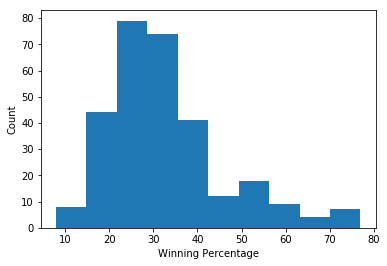

In [727]:
# Distribution of Winning percentages
import matplotlib.pyplot as plt

plt.hist(np.array(wpct)*100)
plt.xlabel('Winning Percentage')
plt.ylabel('Count')
plt.show()


Around 80 teams have a winning percentage of approximately 30% and less than 40 teams (out of 296 teams) win more than 50% 

In [790]:
list(team_stats_gp_2.groupby(['team_long_name','Total Scores'] + index1 + index2).groups.keys())

[('1. FC Kaiserslautern',
  119,
  57,
  57,
  150,
  37,
  53,
  24,
  58,
  73,
  20,
  28,
  17,
  25,
  0.32456140350877194,
  0.4649122807017544,
  0.3508771929824561,
  0.2982456140350877),
 ('1. FC Kaiserslautern',
  427,
  106,
  106,
  182,
  136,
  27,
  49,
  247,
  79,
  79,
  6,
  57,
  21,
  0.6415094339622641,
  0.12735849056603774,
  0.7452830188679245,
  0.5377358490566038),
 ('1. FC Köln',
  129,
  47,
  47,
  165,
  25,
  45,
  24,
  76,
  74,
  16,
  17,
  9,
  28,
  0.26595744680851063,
  0.4787234042553192,
  0.3404255319148936,
  0.19148936170212766),
 ('1. FC Köln',
  184,
  76,
  76,
  209,
  54,
  63,
  35,
  105,
  91,
  30,
  22,
  24,
  41,
  0.35526315789473684,
  0.4144736842105263,
  0.39473684210526316,
  0.3157894736842105),
 ('1. FC Köln',
  695,
  152,
  152,
  223,
  218,
  36,
  50,
  389,
  88,
  120,
  9,
  98,
  27,
  0.7171052631578947,
  0.11842105263157894,
  0.7894736842105263,
  0.6447368421052632),
 ('1. FC Nürnberg',
  153,
  68,
  68,
  

In [810]:
rows=list(df.index)
#print(len(rows))
#print((pd.DataFrame(team_stats_gp['side'][rows[0]])).shape)
#print(type(away_matches.loc[0,'a_matches']))
team_stats_gp_temp=[]


win_1=[]
loss_1=[]
draw_1=[]
ad_1=[]
hd_1=[]



ts_1=[]
tc_1=[]
hs_1=[]
hc_1=[]
home_w_1=[]
home_l_1=[]
away_w_1=[]
away_l_1=[]
for i in range(away_matches.shape[0]):
    s=0
    c=0
    hw=0
    aw=0
    hl=0
    al=0 
    w=0
    l=0
    d=0
    ## away matches
    ad_1.append(away_matches.loc[i,'a_matches'])
    #team_stats_gp_temp=np.concatenate((team_stats_gp_temp,ad))
    ## home matches
    hd_1.append(home_matches.loc[i,'h_matches'])
    #team_stats_gp_temp=np.concatenate((team_stats_gp_temp,hd))
    ## total score
    ts_1.append(np.sum(team_stats_gp['goals_scored'][rows[i]]))
    ## total conceded
    tc_1.append(np.sum(team_stats_gp['goals_conceded'][rows[i]]))
   # team_stats_gp_temp=np.concatenate((team_stats_gp_temp,ts))
    for k in (team_stats_gp['Result'][rows[i]]):
        if k == 'Win':
              w=w+1
        elif k == 'Draw':
              d=d+1
        else:
              l=l+1
    ## number of wins          
    win_1.append(w)
    ## number of losses
    loss_1.append(l)
    ## number of draws
    draw_1.append(d)
        
    for j in range(len(team_stats_gp['side'][rows[i]])):
        if team_stats_gp['side'][rows[i]].iloc[j] == 'home':
            s=s+team_stats_gp['goals_scored'][rows[i]].iloc[j]
            c=c+team_stats_gp['goals_conceded'][rows[i]].iloc[j]
            if team_stats_gp['Result'][rows[i]].iloc[j] == 'Win':
                hw=hw+1
            elif team_stats_gp['Result'][rows[i]].iloc[j] == 'Defeat':
                hl=hl+1
        else:
            if team_stats_gp['Result'][rows[i]].iloc[j] == 'Win':
                aw=aw+1
            elif team_stats_gp['Result'][rows[i]].iloc[j] == 'Defeat':
                al=al+1

    ## home scored
    hs_1.append(s)
    ## home conceded
    hc_1.append(c)  
    ## home wins
    home_w_1.append(hw)
    ## home loss
    home_l_1.append(hl)
    ## away wins
    away_w_1.append(aw)
    ## away loss
    away_l_1.append(al)
             


In [843]:
teams=[team_stats_gp['side'][rows[i]].index[0][0] for i in range(away_matches.shape[0])]

In [858]:
len(np.divide(win_1,np.add(ad_1,hd_1)))

296

In [859]:
win_pct_1=np.divide(win_1,np.add(ad_1,hd_1))
loss_pct_1=np.divide(loss_1,np.add(ad_1,hd_1))
home_win_pct_1=np.divide(home_w_1,hd_1)
away_win_pct_1=np.divide(away_w_1,ad_1)

In [873]:

team_stats_1=pd.DataFrame({ 'Team Name': teams,'Total Scores': ts_1,'Away Matches':ad_1 ,'Home Matches':hd_1,'Total Conceded':tc_1,'Total Wins':win_1,'Total Defeat':loss_1,'Total Draws':draw_1,'Home Scored':hs_1,'Home Conceded':hc_1,'Home Wins':home_w_1, 'Home Defeats':home_l_1, 'Away Wins':away_w_1,'Away Defeats':away_l_1,'Winning Percentage': win_pct_1,'Loss Percentage':loss_pct_1 ,'Home Winning Percentage':home_win_pct_1,'Away Winning Percentage':away_win_pct_1})

t=pd.Series(team_stats_1['Team Name'].values)
index=['Total Scores','Away Matches' ,'Home Matches','Total Conceded','Total Wins','Total Defeat','Total Draws','Home Scored','Home Conceded','Home Wins', 'Home Defeats', 'Away Wins','Away Defeats','Winning Percentage','Loss Percentage','Home Winning Percentage','Away Winning Percentage']
for i in index:
    t=pd.concat([t,pd.Series(team_stats_1[i].values,index=team_stats_1.index)], axis=1)
    
    
t.columns=['Team Name'] + index

In [875]:
t.to_csv('extra data per team.csv')